<a href="https://colab.research.google.com/github/ciriloerick/NLP-Python/blob/master/Erick%20-%20TP%20-%20NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
url = 'https://raw.githubusercontent.com/ciriloerick/NLP-Python/master/test.csv'
test = pd.read_csv(url)
url = 'https://raw.githubusercontent.com/ciriloerick/NLP-Python/master/train.csv'
train = pd.read_csv(url)



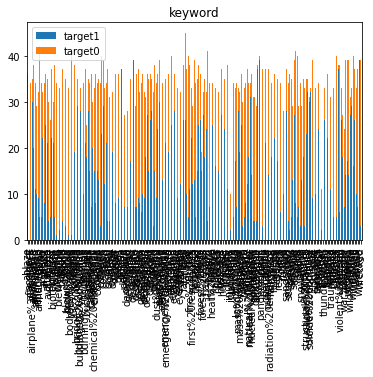

In [4]:
target1=train.keyword[train.target == 1].value_counts()
target0=train.keyword[train.target == 0].value_counts()
df=pd.DataFrame({'target1':target1,'target0':target0})
df.plot(kind='bar',stacked=True,title='keyword')

In [9]:
target1.head(20)

wreckage                 39
derailment               39
outbreak                 39
oil%20spill              37
typhoon                  37
debris                   37
evacuated                32
suicide%20bomb           32
rescuers                 32
suicide%20bombing        32
razed                    31
nuclear%20disaster       31
airplane%20accident      30
suicide%20bomber         30
earthquake               30
bridge%20collapse        29
collision                29
wildfire                 29
buildings%20on%20fire    28
evacuation               28
Name: keyword, dtype: int64

In [11]:
count_vectorizer = feature_extraction.text.CountVectorizer()
example_train_vectors = count_vectorizer.fit_transform(train["text"][0:5])
print(example_train_vectors[0].todense().shape)
print(example_train_vectors[0].todense())

(1, 54)
[[0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0]]


In [0]:
train_vectors = count_vectorizer.fit_transform(train["text"])

test_vectors = count_vectorizer.transform(test["text"])

In [0]:
clf = linear_model.RidgeClassifier()

In [0]:
scores = model_selection.cross_val_score(clf, train_vectors, train["target"], cv=3, scoring="f1")

In [17]:
scores

array([0.59453669, 0.56498283, 0.64082434])

In [18]:
clf.fit(train_vectors, train["target"])

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [0]:
url = 'https://raw.githubusercontent.com/ciriloerick/NLP-Python/master/sample_submission.csv'
sample_submission = pd.read_csv(url)
sample_submission["target"] = clf.predict(test_vectors)

In [20]:
sample_submission.head()

,id,target
0,0,0
1,2,1
2,3,1
3,9,0
4,11,1
